In [51]:
import numpy as np 
import pandas as pd
import os

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string

df=pd.read_csv('input/deceptive-opinion.csv')


In [28]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


<AxesSubplot:xlabel='deceptive', ylabel='count'>

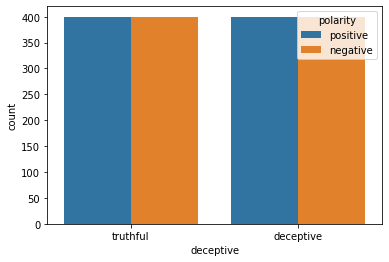

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['deceptive'],hue='polarity',data=df)

<AxesSubplot:xlabel='deceptive', ylabel='count'>

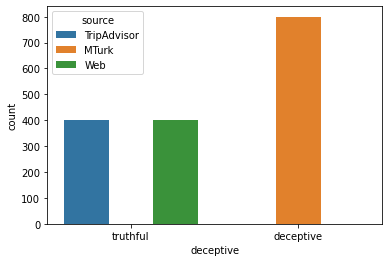

In [30]:
sns.countplot(x=df['deceptive'],hue='source',data=df)

In [31]:
df['text'].head()

0    We stayed for a one night getaway with family ...
1    Triple A rate with upgrade to view room was le...
2    This comes a little late as I'm finally catchi...
3    The Omni Chicago really delivers on all fronts...
4    I asked for a high floor away from the elevato...
Name: text, dtype: object

In [32]:

def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [33]:
df['text']=df['text'].apply(text_cleaning)

In [34]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,we stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,triple a rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,this comes a little late as i m finally catchi...
3,truthful,omni,positive,TripAdvisor,the omni chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,i asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,problems started when i booked the intercontin...
1596,deceptive,amalfi,negative,MTurk,the amalfi hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,the intercontinental chicago magnificent mile ...
1598,deceptive,palmer,negative,MTurk,the palmer house hilton while it looks good i...


In [35]:
df['complete_text']=df['source'] + '' +df['text']

In [36]:
x=df['complete_text']
y=df['deceptive']

In [37]:
df['complete_text']

0       TripAdvisorwe stayed for a one night getaway w...
1       TripAdvisortriple a rate with upgrade to view ...
2       TripAdvisorthis comes a little late as i m fin...
3       TripAdvisorthe omni chicago really delivers on...
4       TripAdvisori asked for a high floor away from ...
                              ...                        
1595    MTurkproblems started when i booked the interc...
1596    MTurkthe amalfi hotel has a beautiful website ...
1597    MTurkthe intercontinental chicago magnificent ...
1598    MTurkthe palmer house hilton  while it looks g...
1599    MTurkas a former chicagoan  i m appalled at th...
Name: complete_text, Length: 1600, dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=LabelEncoder()
y=le.fit_transform(y)

In [39]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))

In [42]:
x_train=cv.fit_transform(x_train)

In [43]:
x_train

<1280x79176 sparse matrix of type '<class 'numpy.int64'>'
	with 287624 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=100000)
lr.fit(x_train,y_train)
pred_1=lr.predict(cv.transform(x_test))

In [45]:
from sklearn.metrics import accuracy_score
score_1=accuracy_score(y_test,pred_1)

In [46]:
score_1

0.909375

In [47]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_2=svm.predict(cv.transform(x_test))
score_2=accuracy_score(y_test,pred_2)

In [48]:
score_2

0.871875

In [49]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_3=nb.predict(cv.transform(x_test))
score_3=accuracy_score(y_test,pred_3)

In [50]:
score_3

0.903125